In [1]:
# !pip install yfinance
# !pip install --upgrade pandas

In [2]:
# IMPORT THE LIBRARY
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Import data from Yahoo Finance
Brent = yf.Ticker("BZ=F")
    
# GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
end_date = datetime.now().strftime('%Y-%m-%d')
brent_hist = Brent.history(start='2012-01-01', end=end_date)
print(brent_hist)

                                 Open        High         Low       Close  \
Date                                                                        
2012-01-03 00:00:00-05:00  109.949997  112.290001  109.949997  112.129997   
2012-01-04 00:00:00-05:00  111.699997  113.820000  111.699997  113.699997   
2012-01-05 00:00:00-05:00  113.949997  114.050003  112.570000  112.739998   
2012-01-06 00:00:00-05:00  112.910004  113.300003  112.190002  113.059998   
2012-01-09 00:00:00-05:00  113.430000  113.589996  112.209999  112.449997   
...                               ...         ...         ...         ...   
2024-02-23 00:00:00-05:00   83.419998   83.480003   81.440002   81.620003   
2024-02-26 00:00:00-05:00   81.589996   83.059998   81.019997   82.529999   
2024-02-27 00:00:00-05:00   82.550003   83.739998   82.099998   83.650002   
2024-02-28 00:00:00-05:00   83.400002   84.300003   82.620003   83.680000   
2024-02-29 00:00:00-05:00   83.650002   83.739998   83.040001   83.639999   

C:\Users\oces0\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
# Change daily data to monthly data by averaging it
brent_hist ['Date'] = brent_hist.index 
brent_hist_mon = brent_hist.resample('M', on='Date').mean()

C:\Users\oces0\AppData\Local\Temp\ipykernel_17772\4065122044.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  brent_hist_mon = brent_hist.resample('M', on='Date').mean()


Text(0, 0.5, 'Price, usd')

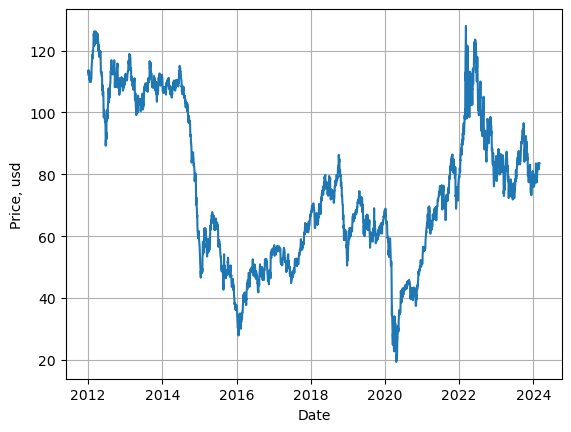

In [4]:
plt.plot(brent_hist.index.values, brent_hist.Close.values)
plt.grid('on')
plt.xlabel('Date')
plt.ylabel('Price, usd')

Text(0, 0.5, 'Price, usd')

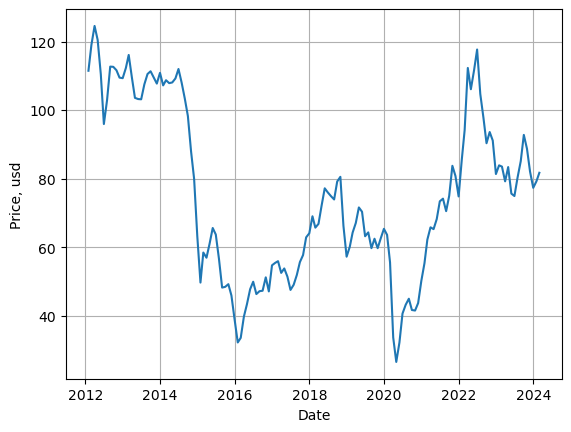

In [5]:
plt.plot(brent_hist_mon.index.values, brent_hist_mon.Close.values)
plt.grid('on')
plt.xlabel('Date')
plt.ylabel('Price, usd')

In [6]:
# Saving data
# brent_hist_mon.to_csv('Monthly_brent.csv')